In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil import parser
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df = df[pd.notnull(df['> Tag/Category'])]

In [4]:
df.head()

,> Duration,> Description,> Tag/Category,> Start Date,> End Date,> Notes,> Id
0,0.073,<Untitled>,text Bhalu,2019-03-22 15:03:53,2019-03-22 15:08:15,NaN,wtHNb6eWTnevv8dE7aDcmQ
1,0.131,<Untitled>,misc,2019-03-22 14:55:57,2019-03-22 15:03:49,NaN,I3sAPGB6TnudVVzaobqQ9w
2,1.016,<Untitled>,commute,2019-03-22 13:54:55,2019-03-22 14:55:52,NaN,TNb6pN8mSa6EfQ9p9DBbXg
3,6.521,<Untitled>,college,2019-03-22 07:23:39,2019-03-22 13:54:53,NaN,HcFZIVjpRwyerGS1xE83Lw
4,1.023,<Untitled>,commute,2019-03-22 06:22:13,2019-03-22 07:23:34,NaN,gFgArE74SI6TgrAx9rIkGQ


## Look at records from Feb 10, 2019

In [5]:
after_df = df[df['> Start Date'] >= '2019-02-10']

In [6]:
before_df = df[df['> Start Date'] < '2019-02-10']

In [29]:
def get_work_rows(df):
    work_rows = df[(df['> Tag/Category'] == 'work') | (df['> Tag/Category'] == 'study') | 
               (df['> Tag/Category'] == 'code') | (df['> Tag/Category'] == 'blog')]
    
    return work_rows

In [8]:
def get_work_times(work_rows):
    work_times = []

    for _, row in work_rows.iterrows():
        start = row['> Start Date']
        end = row['> End Date']

        start_min = int(parser.parse(start).strftime('%H')) * 60 + int(parser.parse(start).strftime('%M'))
        end_min = int(parser.parse(end).strftime('%H')) * 60 + int(parser.parse(end).strftime('%M'))

        work_times.extend(list(range(start_min, end_min + 1)))
    
    return work_times

In [9]:
before_df['Month'] = before_df['> Start Date'].map(lambda x: parser.parse(x).strftime('%m'))

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
before_df.head()

,> Duration,> Description,> Tag/Category,> Start Date,> End Date,> Notes,> Id,Month
1129,0.363,<Untitled>,browsing,2019-02-09 23:45:56,2019-02-10 00:07:44,NaN,TInimkRIToiJWmaYRY-TyQ,02
1130,0.129,<Untitled>,washroom,2019-02-09 23:38:08,2019-02-09 23:45:52,NaN,AWr4v6DPShaCw_sTVrnM0A,02
1131,0.071,<Untitled>,misc,2019-02-09 23:33:49,2019-02-09 23:38:03,NaN,kLaA54k3S9y_fWNskFN43A,02
1132,6.949,<Untitled>,sleep,2019-02-09 16:36:45,2019-02-09 23:33:43,NaN,_D0zXURGTQ6kETyYvPE75Q,02
1133,1.688,<Untitled>,show/sitcom,2019-02-09 14:55:13,2019-02-09 16:36:29,NaN,p8DV3fd4TieBrK2u7yZgzA,02


In [11]:
after_df['Month'] = after_df['> Start Date'].map(lambda x: parser.parse(x).strftime('%m'))

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
before_df['Day'] = before_df['> Start Date'].map(lambda x: parser.parse(x).strftime('%d'))
before_df['Year'] = before_df['> Start Date'].map(lambda x: parser.parse(x).strftime('%Y'))

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
after_df['Day'] = after_df['> Start Date'].map(lambda x: parser.parse(x).strftime('%d'))
after_df['Year'] = after_df['> Start Date'].map(lambda x: parser.parse(x).strftime('%Y'))

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
list(before_df.groupby(['Year', 'Month', 'Day']))[1][1]

,> Duration,> Description,> Tag/Category,> Start Date,> End Date,> Notes,> Id,Month,Day,Year
8085,0.152,<Untitled>,study,2018-06-24 23:57:38,2018-06-25 00:06:45,NaN,evxdCDMLTPiVVxmcusv6lg,06,24,2018
8086,0.010,monica/manisha,text others,2018-06-24 23:56:42,2018-06-24 23:57:18,NaN,mW42RHipTz-rCu6DxzowNg,06,24,2018
8087,0.033,beard,washroom,2018-06-24 23:54:35,2018-06-24 23:56:33,NaN,B2X6FXK0SmWdefqNy1UUig,06,24,2018
8088,0.782,<Untitled>,study,2018-06-24 23:07:25,2018-06-24 23:54:21,NaN,RbsUKD0wQ9WsdfSx7bc60Q,06,24,2018
8089,0.052,monica/manisha,text others,2018-06-24 23:04:15,2018-06-24 23:07:23,NaN,cu4FTPyZTNu04bnjr1VuXQ,06,24,2018
8090,0.124,<Untitled>,washroom,2018-06-24 22:56:39,2018-06-24 23:04:06,NaN,f4b93apsR02DCNdCqb2Fxw,06,24,2018
8091,0.236,<Untitled>,study,2018-06-24 22:42:18,2018-06-24 22:56:28,NaN,1OedJLwRS2OMu4ku4A2DEA,06,24,2018
8092,0.215,<Untitled>,browsing,2018-06-24 22:29:04,2018-06-24 22:41:58,NaN,l0imWZFbQ4SfQSeNN6h6xQ,06,24,2018
8093,0.028,<Untitled>,washroom,2018-06-24 22:26:40,2018-06-24 22:28:20,NaN,eT7mNM0XSxq1Sq_voTn-9g,06,24,2018
8094,0.141,<Untitled>,study,2018-06-24 22:18:08,2018-06-24 22:26:34,NaN,vv5hAL_XTNCbiQp-T9hCyw,06,24,2018


In [15]:
before_groups = before_df.groupby(['Year', 'Month', 'Day'])
after_groups = after_df.groupby(['Year', 'Month', 'Day'])

In [30]:
before_work_lengths = [len(get_work_times(get_work_rows(x[1]))) for x in list(before_groups)]
after_work_lengths = [len(get_work_times(get_work_rows(x[1]))) for x in list(after_groups)]

In [31]:
from scipy.stats import ttest_ind

In [32]:
ttest_ind(before_work_lengths, after_work_lengths, equal_var=False)

Ttest_indResult(statistic=-3.2214688954658337, pvalue=0.0022485575700260836)

In [33]:
print('Mean before:', sum(before_work_lengths) / len(before_work_lengths))
print('Mean after:', sum(after_work_lengths) / len(after_work_lengths))

Mean before: 205.79017857142858
Mean after: 296.3414634146341


Thus, we reject the null hypothesis of identical averages!! That is, the means of the work done under both sleep cycles is statistically significant!!

# Include college as productive work

In [19]:
def get_work_rows(df):
    work_rows = df[(df['> Tag/Category'] == 'work') | (df['> Tag/Category'] == 'study') | 
               (df['> Tag/Category'] == 'code') | (df['> Tag/Category'] == 'blog') |
                (df['> Tag/Category'] == 'college')]
    
    return work_rows

In [20]:
before_work_lengths = [len(get_work_times(get_work_rows(x[1]))) for x in list(before_groups)]
after_work_lengths = [len(get_work_times(get_work_rows(x[1]))) for x in list(after_groups)]

In [21]:
ttest_ind(before_work_lengths, after_work_lengths, equal_var=False)

Ttest_indResult(statistic=-3.3016313036501086, pvalue=0.0016599374012097004)

In [22]:
print('Mean before:', sum(before_work_lengths) / len(before_work_lengths))
print('Mean after:', sum(after_work_lengths) / len(after_work_lengths))

Mean before: 373.4375
Mean after: 473.609756097561


## Plot productive hours for entire 9 months

In [23]:
def get_work_rows(df):
    work_rows = df[(df['> Tag/Category'] == 'work') | (df['> Tag/Category'] == 'study') | 
               (df['> Tag/Category'] == 'code') | (df['> Tag/Category'] == 'blog')]
    
    return work_rows

In [24]:
wr = get_work_rows(df)

In [25]:
wt = get_work_times(wr)

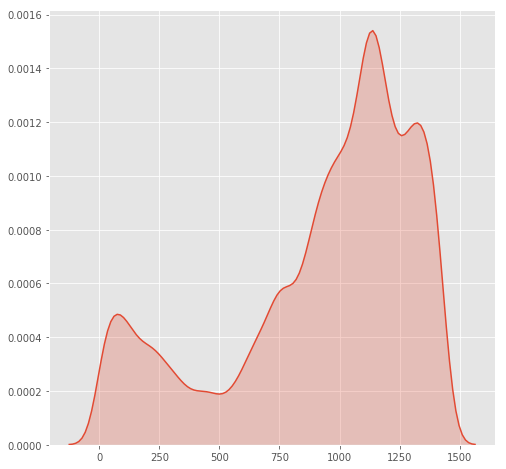

In [26]:
fig, ax = plt.subplots();
fig.set_size_inches(8, 8);
sns.distplot(wt, ax=ax, hist=False, kde_kws = {'shade': True});

In [27]:
wr['> Start Date'] = [parser.parse(x).strftime('%H') for x in wr['> Start Date']]

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


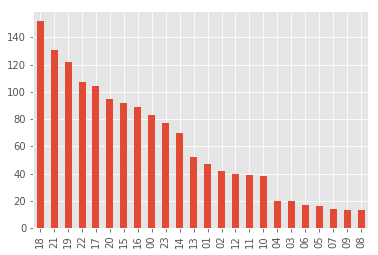

In [28]:
wr['> Start Date'].value_counts().plot(kind='bar');